In [35]:
import math

In [36]:
from matplotlib.ticker import EngFormatter

engf = EngFormatter()

def eng_format(value, unit=''):
    f = EngFormatter(unit=unit)
    return f(value)

In [37]:
from IPython.display import Markdown, display

def highlight(variable, color='red'):
    display(Markdown(f'<span style="color: {color}; font-weight: bold;">{variable}</span>'))

highlight('Answers will be highlighted in red')

<span style="color: red; font-weight: bold;">Answers will be highlighted in red</span>

# EET221L - Instrumentation and Measurement Lab - Activity # 1

In this notebook we will be working with absolute and relative uncertainties, often swapping back and forth between them.  
After some research I have decided on this convention:  

$$
\Delta x = \text{Absolute uncertainty}
$$

$$
\delta x = \text{Relative uncertainty}
$$

In code a capital `D[var]` will represent a capital delta, and a lowercase `d[var]` will represent a lowercase delta.

When adding uncertainties:
$$
\Delta z = \sqrt{\Delta x^2 + \Delta y^2}
$$

When multiplying or dividing uncertainties:
$$
\delta z = \sqrt{\delta x^2 + \delta y^2}
$$

When converting between the two:
$$
\delta x = \frac{\Delta x}{x}
$$

### Problem 1
Calculate the total resistance with uncertainty estimation, if the following resistors are connected in series.  
    R1 = 22 kΩ ±5%  
    R2 = 680 Ω ±5%  

In [38]:
# Given
r1 = 5600
r2 = 1500
dr1 = .05
dr2 = .05

# Find
z = __
dz = __

In [39]:
# Since we are adding we want to use absolute uncertainties to find Dz
Dr1 = dr1 * r1
Dr2 = dr2 * r2
Dz = math.hypot(Dr1,Dr2)
Dz

289.8706608127149

In [40]:
# Resistors in series are summed
z = r1 + r2
z # Ω

7100

In [41]:
# And we can convert Dz back to relative uncertainty
dz = Dz/z
dz

0.04082685363559365

In [42]:
highlight(f'{eng_format(z, 'Ω')} ±{dz*100:.2f}%')

<span style="color: red; font-weight: bold;">7.1 kΩ ±4.08%</span>

### Problem 2
Calculate the total resistance with uncertainty estimation, if the following resistors are connected in parallel.  
R1 = 47 Ω ±5%  
R2 = 68 Ω ±5%  

In [43]:
# Given
r1 = 47
r2 = 68
dr1 = .05
dr2 = .05

# Find
rt = __
drt = __

To tackle this, we'll use a shortcut for calculating two parallel resistors, as opposed to the reciprocal of the sum of reciprocals:
$$
R_T = \frac{(R_1 \pm \delta R_1) \cdot (R_2 \pm \delta R_2)}{(R_1 \pm \Delta R_1) + (R_2 \pm \Delta R_2)}
$$

This allows us to work with the uncertainties of the numerator and denominator separately.

In [44]:
# First the numerator
numer = r1 * r2
dnumer = math.hypot(dr1,dr2) #relative

numer, dnumer

(3196, 0.07071067811865475)

In [45]:
# Then the denominator
Dr1 = dr1 * r1
Dr2 = dr2 * r2

denom = r1 + r2
Ddenom = math.hypot(Dr1, Dr2) #absolute

denom, Ddenom

(115, 4.133098111586514)

In [46]:
# In order to evaluate the fraction , we need to convert Ddenom into relative uncertainty
ddenom = Ddenom/denom
ddenom

0.035939983579013166

In [47]:
# Now we just evaluate
rt = numer/denom
drt = math.hypot(dnumer, ddenom) #relative
rt, drt

(27.791304347826088, 0.07932012619543502)

In [48]:
highlight(f'{eng_format(rt, 'Ω')} ±{drt*100:.2f}%')

<span style="color: red; font-weight: bold;">27.7913 Ω ±7.93%</span>

### Problem 3
In a circuit, voltage across a resistor is measured as `2.346 V` with uncertainty of `0.035 V` and current is measured as `0.00695 A` with uncertainty of `0.00076 A`.  
Calculate the resistance value of the resistor with uncertainty. 

In [49]:
# Given
v =  2.02
Dv =  .025
i =   .00235
Di =  .000059

# Find
r = __
Dr = __

By Ohm's Law:  
$ R = \frac{V}{I} $

In [50]:
# Since we are dividing, we'll need relative uncertainties:
dv = Dv/v
di = Di/i
dv, di

(0.012376237623762377, 0.0251063829787234)

In [51]:
# Then we can evaluate
r = v/i
dr = math.hypot(dv,di)
r, dr

(859.5744680851063, 0.027991100799971472)

In [52]:
# Assuming we want Absolute uncertainty
Dr = dr * r

In [53]:
highlight(f'{r:.2f}Ω ±{Dr:.2f}Ω')

<span style="color: red; font-weight: bold;">859.57Ω ±24.06Ω</span>

### Problem 4
In a circuit, voltage across a resistor is measured as `3.465V` with uncertainty of `0.025V` and the resistance value is measured as `1.65kΩ` with uncertainty of `36.45Ω`.  Calculate the current through the resistor with uncertainty. 

In [54]:
# Given
v = 3.465
Dv = 0.025
r = 1650
Dr = 36.45

# Find
i = __
Di = __

By Ohm's Law:
$$ I = \frac{V}{R} $$

In [55]:
# Since we are dividing, we'll need relative uncertainties:
dv = Dv/v
dr = Dr/r
dv, dr

(0.007215007215007216, 0.02209090909090909)

In [56]:
# Then we can evaluate
i = v/r
di = math.hypot(dv, dr)
i, di

(0.0021, 0.023239289868139605)

In [57]:
# Assuming we want Absolute uncertainty
Di = di * i

In [58]:
highlight(f'{eng_format(i)}A ±{eng_format(Di)}A')

<span style="color: red; font-weight: bold;">2.1 mA ±48.8025 µA</span>

In [59]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

In [60]:
def get_rc_critical_frequency(resistance,capacitance):
    return 1/(2*math.pi*resistance*capacitance)

R = 2.2*si.k #Ohms
C = .01*si.u

critical_frequency = get_rc_critical_frequency(R,C)
print(critical_frequency)

7234.315595086151


In [61]:
eng_format(critical_frequency, 'Hz')

'7.23432 kHz'

# Calc output voltage of each opamp

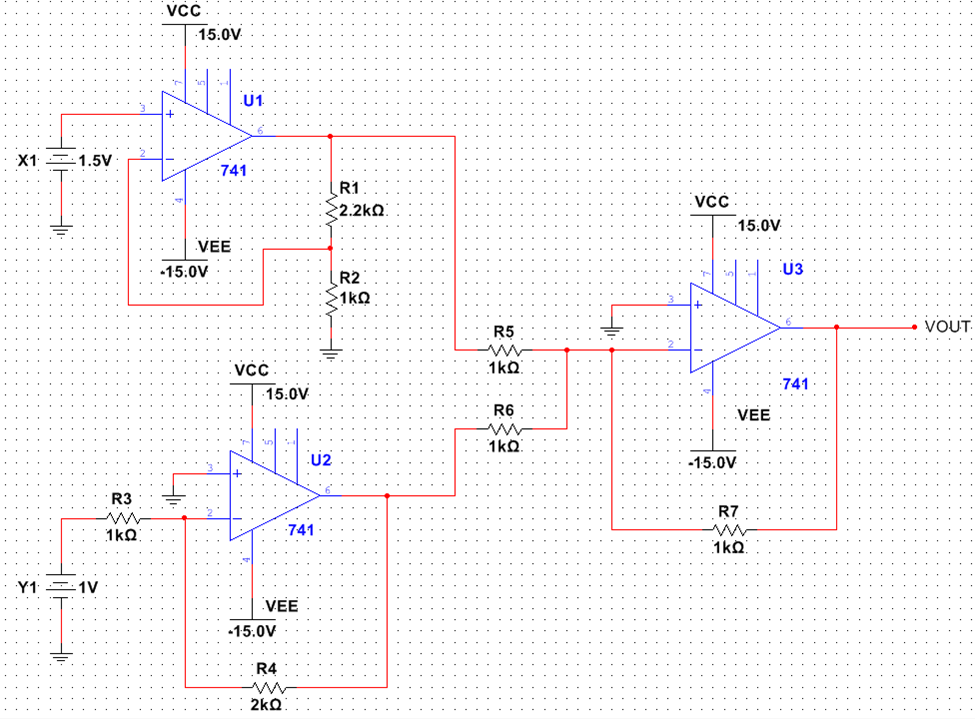

In [62]:
# U1 - Non-inverting negative feedback
v_in = 1.5
r1 = 2.2*si.k
r2 = 1*si.k

G = r2/(r1+r2)
A =  1/G
v_out = v_in*A
v1 = v_out # For use in U3
print('A=',A)
print('Vout=',eng_format(v_out))


A= 3.2
Vout= 4.8


In [63]:
# U2 - Inverting negative feedback
v_in = 1
r1 = 2*si.k
r2 = 1*si.k

G = r2/(r1+r2)
A = 1+ -1/G
v_out = v_in*A
v2 = v_out # For use in U3
print('A=',A)
print('Vout=',eng_format(v_out))

A= -2.0
Vout= −2


In [64]:
# U3 - Inverting addition
v_out = -1*(v1+v2)
v_out

-2.8000000000000007

Here's the formula for this configuration that will apply to any resistor values:
$$V_{out} = -\left(\frac{R_f}{R_1}V_1 + \frac{R_f}{R_2}V_2 + \dots + \frac{R_f}{R_n}V_n\right)$$

However, if all of the resistances are the same, then $\frac{R_f}{R_n} = 1$, which gives us:
$$ V_{out} = - (V_1 + V_2 + \dots + V_n) $$

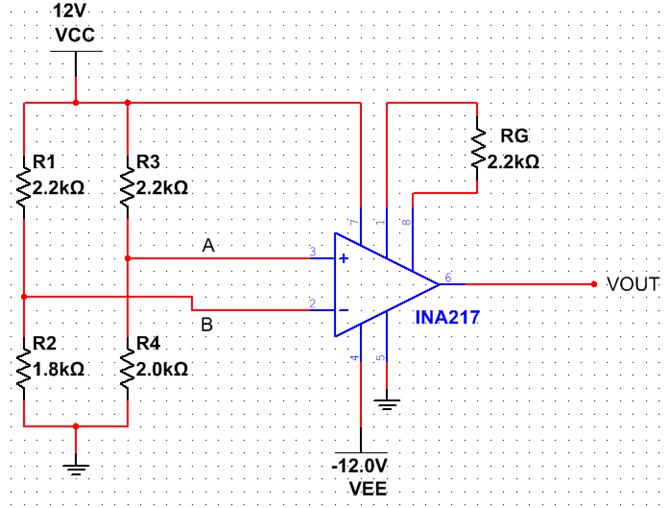

In [65]:
vcc = 12 #V
r1 = 2.2*si.k
r2 = 1.8*si.k
r3 = 2.2*si.k
r4 = 2.0*si.k
rg = 2.2*si.k

In [66]:
in_b = vcc*(r2/(r1+r2))
in_a = vcc*(r4/(r3+r4))
in_a, in_b

(5.7142857142857135, 5.4)

In [67]:
A = 1+(10*si.k/rg)
A

5.545454545454546

In [68]:
v_out = A*(in_a-in_b)
highlight(eng_format(v_out, 'V'))

<span style="color: red; font-weight: bold;">1.74286 V</span>